In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [115]:
data = pd.read_csv("data.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(data['TotalCharges'].isnull().sum())
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
print(data['TotalCharges'].dtype)

11
float64


In [117]:
print(data.isnull().sum())
print(data.dtypes)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      f

In [118]:
data.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


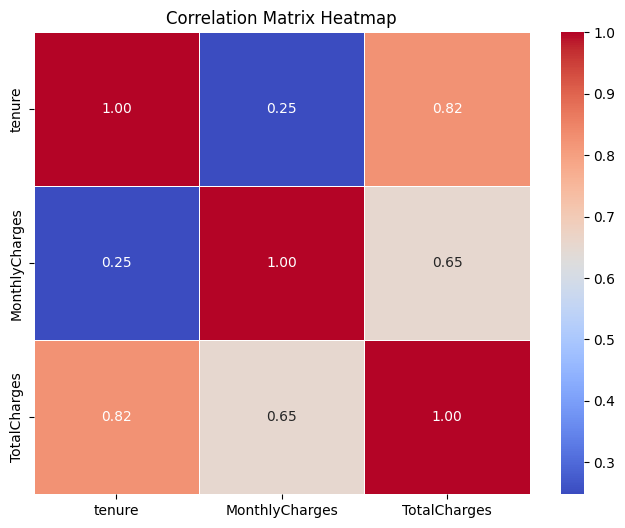

In [119]:
data.replace(' ', np.nan, inplace=True)

numeric_columns = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

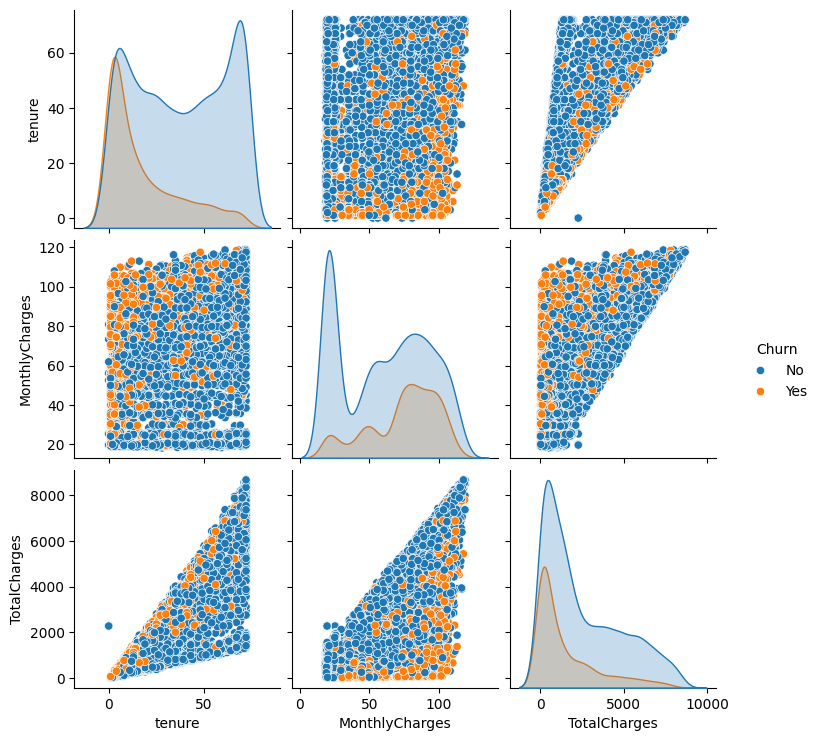

In [120]:

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

sns.pairplot(data, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')
plt.show()

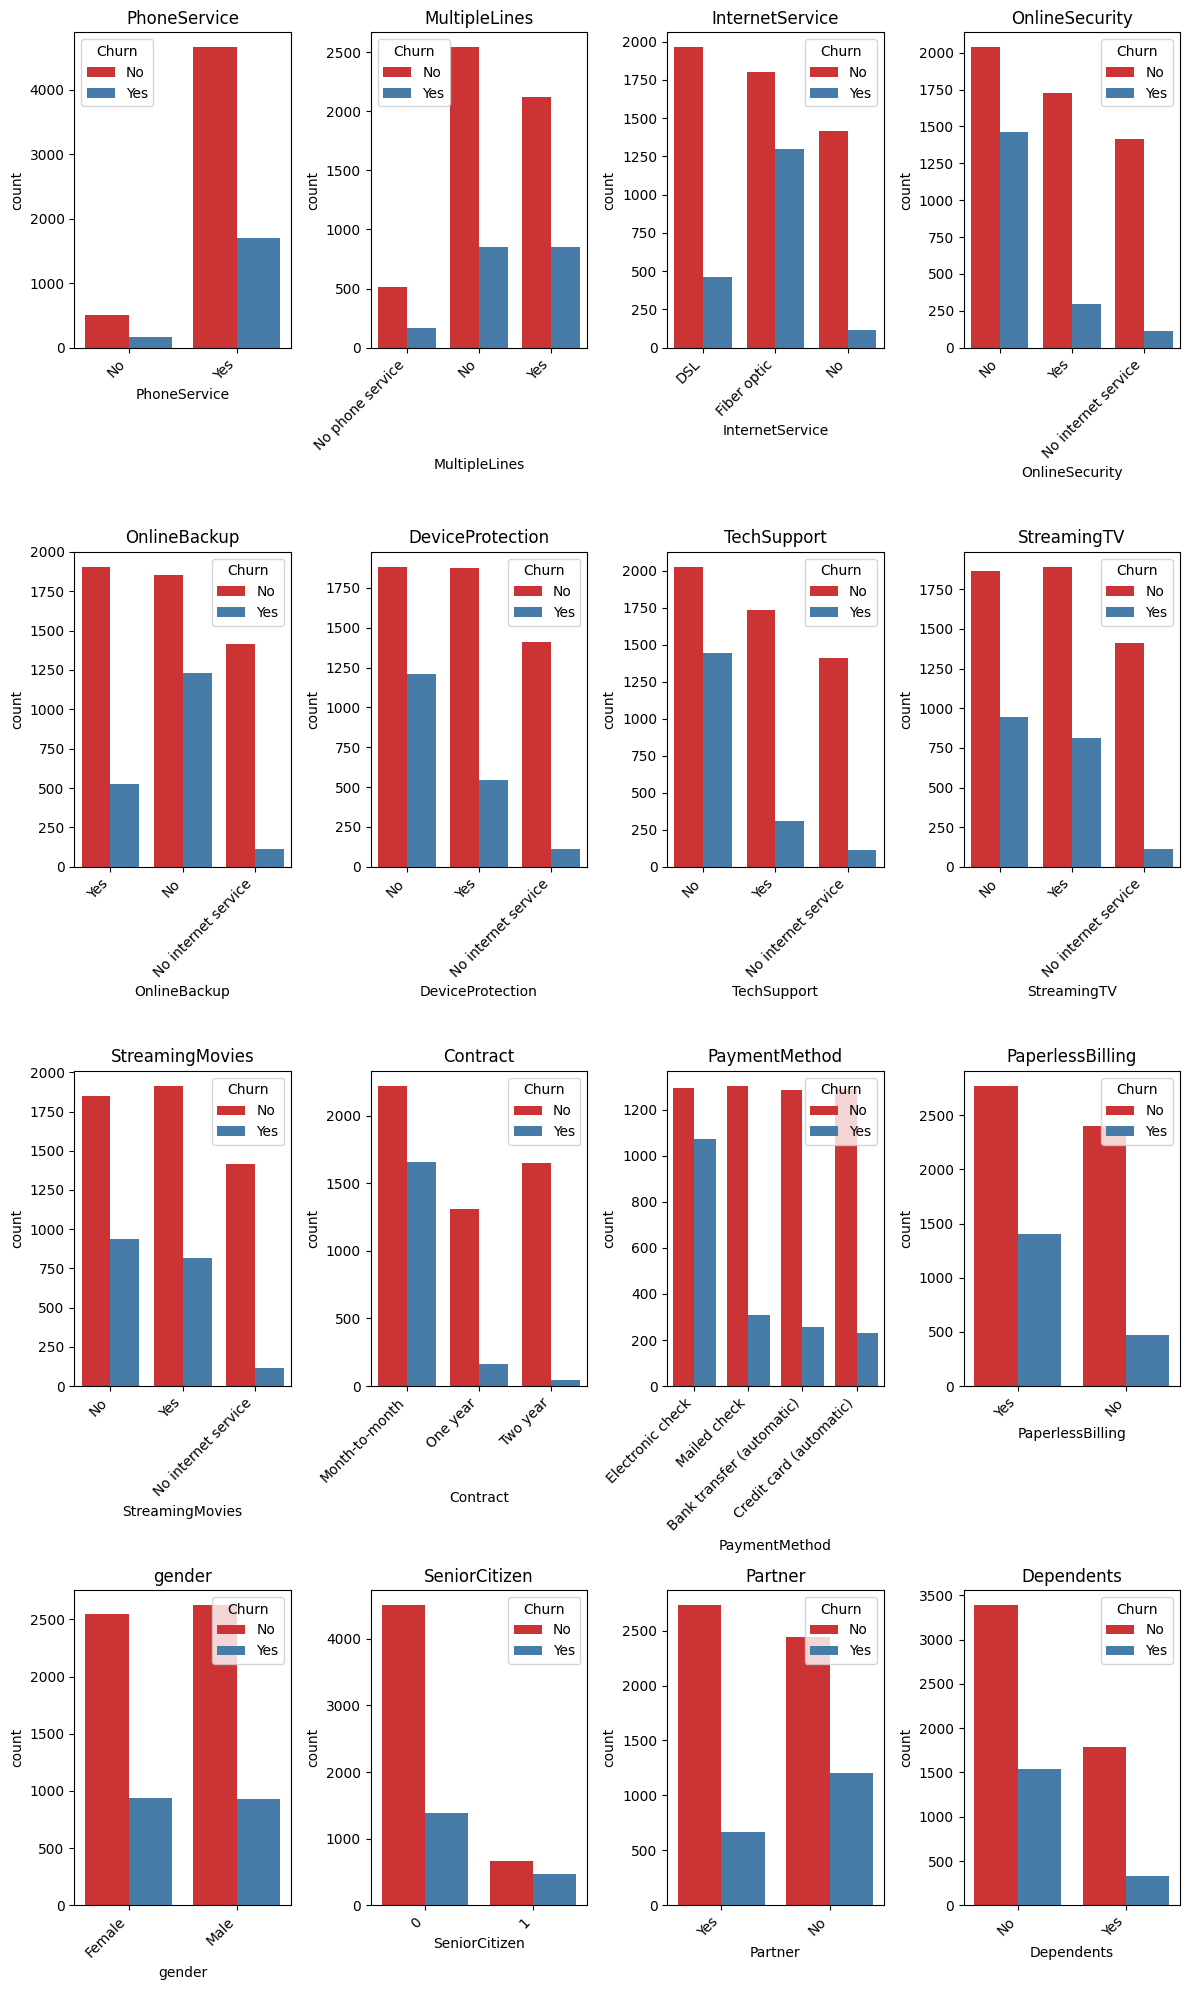

In [121]:
categories = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaymentMethod', 'PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']

rows = len(categories)
col = 4 
full_rows = rows // col
last_rows = rows % col 

fig, axes = plt.subplots(full_rows + (1 if last_rows > 0 else 0), col, figsize=(12, 5 * (full_rows + (1 if last_rows > 0 else 0))))

axes = axes.flatten()
for i, column in enumerate(categories):
    if i < rows:
        sns.countplot(x=column, hue='Churn', data=data, ax=axes[i], palette='Set1')
        axes[i].set_xticks(np.arange(len(data[column].unique())))
        axes[i].set_xticklabels(data[column].unique(), rotation=45, ha='right')
        axes[i].set_title(column)

plt.tight_layout()
plt.show()


In [122]:
# one-hot encoding to change into numerical
df_encoded = pd.get_dummies(data, columns=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaymentMethod', 'PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], drop_first=True)
origninal = data.columns.drop(['customerID', 'Churn'])
encoded_columns = df_encoded.columns

# Extract only the original columns without the one-hot encoded attributes
origninal_without_attributes = [col for col in origninal if any(col.startswith(encoded_col) for encoded_col in encoded_columns)]

X_origninal = df_encoded[origninal_without_attributes]
y = df_encoded['Churn']



model = RandomForestClassifier()
model.fit(X_origninal, y)

imp = model.feature_importances_

for column, importance in zip(origninal_without_attributes, imp):
    print(f"Column Name: {column}, Collective Importance: {importance * 100:.2f}%")
    print("\n")






Column Name: tenure, Collective Importance: 20.43%


Column Name: MonthlyCharges, Collective Importance: 39.84%


Column Name: TotalCharges, Collective Importance: 39.73%


